# 지자체별 대상사고통계정보 데이터셋
데이터 링크 : https://taas.koroad.or.kr/api/selectSttDataSet.do

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

plt.rc('font', family='NanumBarunGothic')

pd.set_option('display.max_columns',None)
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
cd /content/drive/MyDrive/일일 데이터 분석/

/content/drive/MyDrive/일일 데이터 분석


In [ ]:
data = pd.read_csv('./자전거사고 다발지역.csv',encoding='cp949')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4357 entries, 0 to 4356
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   사고다발지FID  4357 non-null   int64  
 1   사고다발지ID   4357 non-null   int64  
 2   법정동코드     4357 non-null   int64  
 3   지점코드      4357 non-null   int64  
 4   시도시군구명    4357 non-null   object 
 5   지점명       4357 non-null   object 
 6   발생건수      4357 non-null   int64  
 7   사상자수      4357 non-null   int64  
 8   사망자수      4357 non-null   int64  
 9   중상자수      4357 non-null   int64  
 10  경상자수      4357 non-null   int64  
 11  부상신고자수    4357 non-null   int64  
 12  경도        4357 non-null   float64
 13  위도        4357 non-null   float64
 14  다발지역폴리곤   4357 non-null   object 
dtypes: float64(2), int64(10), object(3)
memory usage: 510.7+ KB


In [ ]:
data.isnull().sum()

사고다발지FID    0
사고다발지ID     0
법정동코드       0
지점코드        0
시도시군구명      0
지점명         0
발생건수        0
사상자수        0
사망자수        0
중상자수        0
경상자수        0
부상신고자수      0
경도          0
위도          0
다발지역폴리곤     0
dtype: int64

In [ ]:
data.head()

,사고다발지FID,사고다발지ID,법정동코드,지점코드,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤
0,161307,2013099,1111013400,11110001,서울특별시 종로구1,서울특별시 종로구 경운동(안국역 부근),4,4,0,0,3,1,126.99,37.58,"{""type"":""Polygon"",""coordinates"":[[[126.9871445..."
1,153927,2013099,1111012300,11110002,서울특별시 종로구2,서울특별시 종로구 서린동(SK빌딩 부근),4,4,0,1,2,1,126.98,37.57,"{""type"":""Polygon"",""coordinates"":[[[126.9826705..."
2,153929,2013099,1111017500,11110003,서울특별시 종로구3,서울특별시 종로구 숭인동(동묘앞역_일반국도6호선_진출 부근),5,5,0,2,2,1,127.02,37.57,"{""type"":""Polygon"",""coordinates"":[[[127.0168437..."
3,139637,2013099,1114016300,11140001,서울특별시 중구1,서울특별시 중구 흥인동(다산교(남단) 부근),4,4,0,1,2,1,127.02,37.57,"{""type"":""Polygon"",""coordinates"":[[[127.017036,..."
4,153931,2013099,1117012800,11170001,서울특별시 용산구1,서울특별시 용산구 한강로3가(용산대우드림월드3차_한강로_진 부근),5,5,0,3,2,0,126.96,37.52,"{""type"":""Polygon"",""coordinates"":[[[126.9633901..."


In [ ]:
set(data['법정동코드'].unique()) - set(code['gugun 입력값'].unique())

{1100,
 1200,
 1300,
 1400,
 1500,
 1600,
 1700,
 1800,
 1900,
 2000,
 2001,
 2004,
 2005,
 2100,
 2200,
 2300,
 2400,
 2500,
 2600,
 2700}

In [ ]:
def preprocessing(dataframe):
  df = dataframe.copy()
  code1 = pd.read_excel('./코드 정보.xlsx',sheet_name=1)
  code2 = pd.read_excel('./코드 정보.xlsx',sheet_name=2)

  for i in range(len(code2)):
    if code2['시도'].isnull()[i] == False:
      v = code2['시도'][i]
    else:
      code2['시도'][i] = v

  sido_dict = {}
  for c, n in zip(code1['종류'],code1['Sido 입력값']):
    sido_dict[str(n)[:2]] = c

  gugun_dict = {}
  for c, n in zip(code1['종류'],code1['Sido 입력값']):
    gugun_dict[n] = c
  for s, c, n in zip(code2['시도'],code2['구군명칭'],code2['gugun 입력값']):
    gugun_dict[n] = s+c

  df['시도'] = df['법정동코드'].map(lambda x: sido_dict[str(x)[:2]])
  df['법정동코드'] = df['법정동코드'].map(lambda x: '경상남도' if x in [2001,2004,2005] else gugun_dict[x])

  return df

ac = preprocessing(data)

In [ ]:
ac.head()

,연도,대상사고 구분명,법정동코드,사고건수,사고건수 구성비,사망자수,사망자수 구성비,치사율,부상자수,부상자수 구성비,인구10만명당 사고건수,자동차1만대당 사고건수,과속,중앙선 침범,신호위반,안전거리 미확보,안전운전 의무 불이행,보행자 보호의무 위반,기타,차대사람,차대차,차량단독,철길건널목,시도
0,2010,전체,서울특별시,41662,18.36,429,7.79,1.03,59718,16.94,414.53,121.26,43.00,1576.00,5202.00,6619.00,22088.00,2079.00,2908.00,10783.00,29579.00,1300.00,0.00,서울특별시
1,2010,어린이사고,서울특별시,1930,13.69,14,11.11,0.73,2154,12.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울특별시
2,2010,노인사고,서울특별시,3528,13.67,125,7.13,3.54,3584,13.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울특별시
3,2010,보행자사고,서울특별시,10946,21.70,228,10.95,2.08,11233,22.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울특별시
4,2010,자전거사고,서울특별시,998,37.48,12,16.44,1.20,1036,37.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울특별시


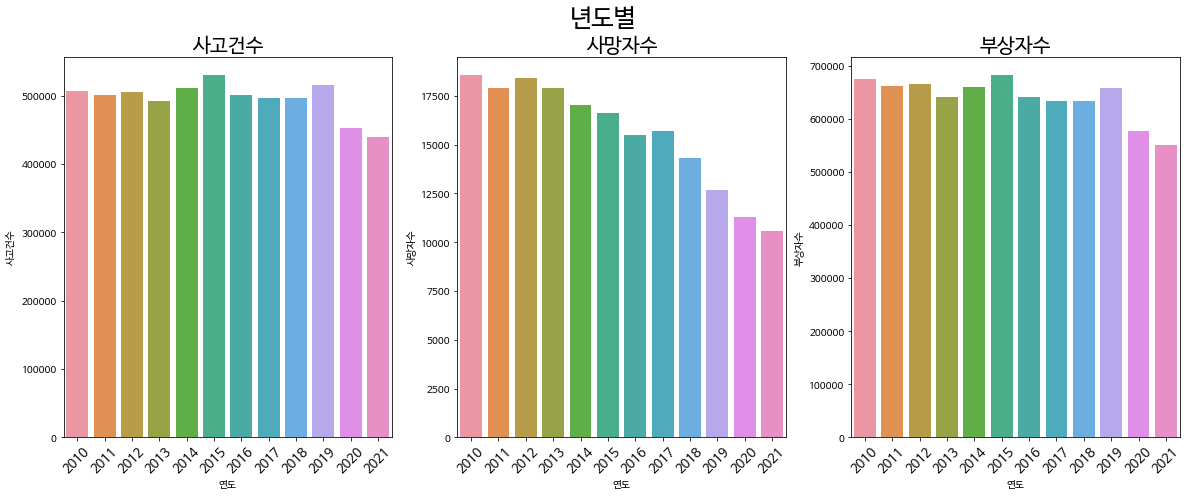

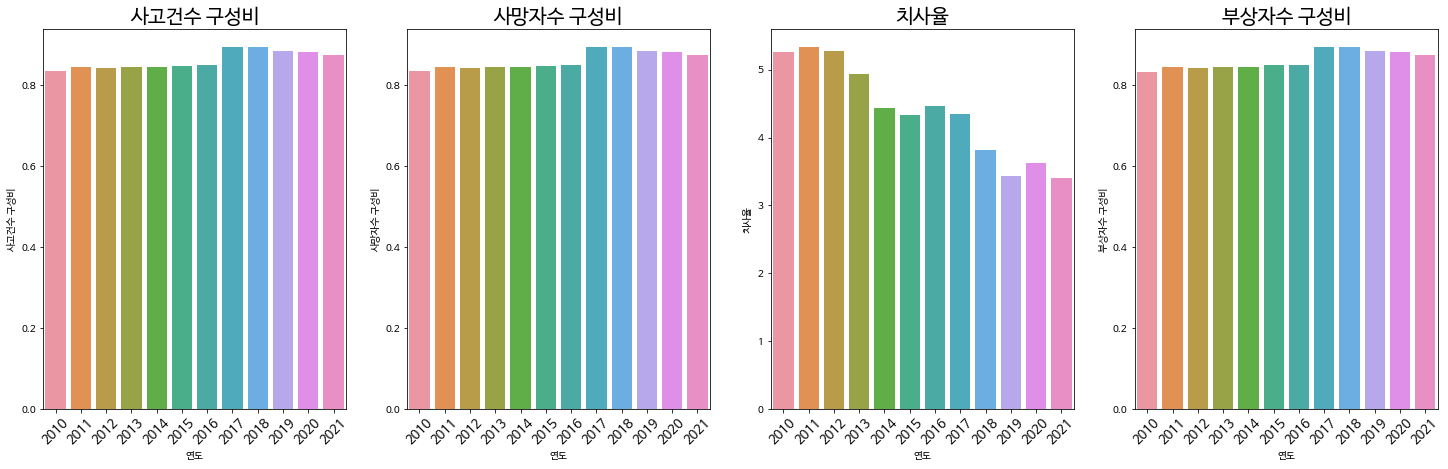

In [ ]:
plt.figure(figsize=(20,7))
plt.subplots_adjust(hspace=1)
plot_df = ac[(ac['대상사고 구분명'] != '전체')].groupby('연도').sum()

col_index = [0,2,5]
for i in range(len(col_index)):
  plt.subplot(1,3,i+1)
  sns.barplot(x = plot_df.index , y = plot_df.iloc[:,col_index[i]])
  plt.title(plot_df.columns[col_index[i]],size=20)
  plt.xticks(rotation=45,size=13)

plt.suptitle('년도별',size=25)
plt.show()

plt.figure(figsize=(25,7))
plt.subplots_adjust(hspace=1)
plot_df = ac[(ac['대상사고 구분명'] != '전체')].groupby('연도').mean()

col_index = [1,3,4,6]
for i in range(len(col_index)):
  plt.subplot(1,4,i+1)
  sns.barplot(x = plot_df.index , y = plot_df.iloc[:,col_index[i]])
  plt.title(plot_df.columns[col_index[i]],size=20)
  plt.xticks(rotation=45,size=13)

plt.show()


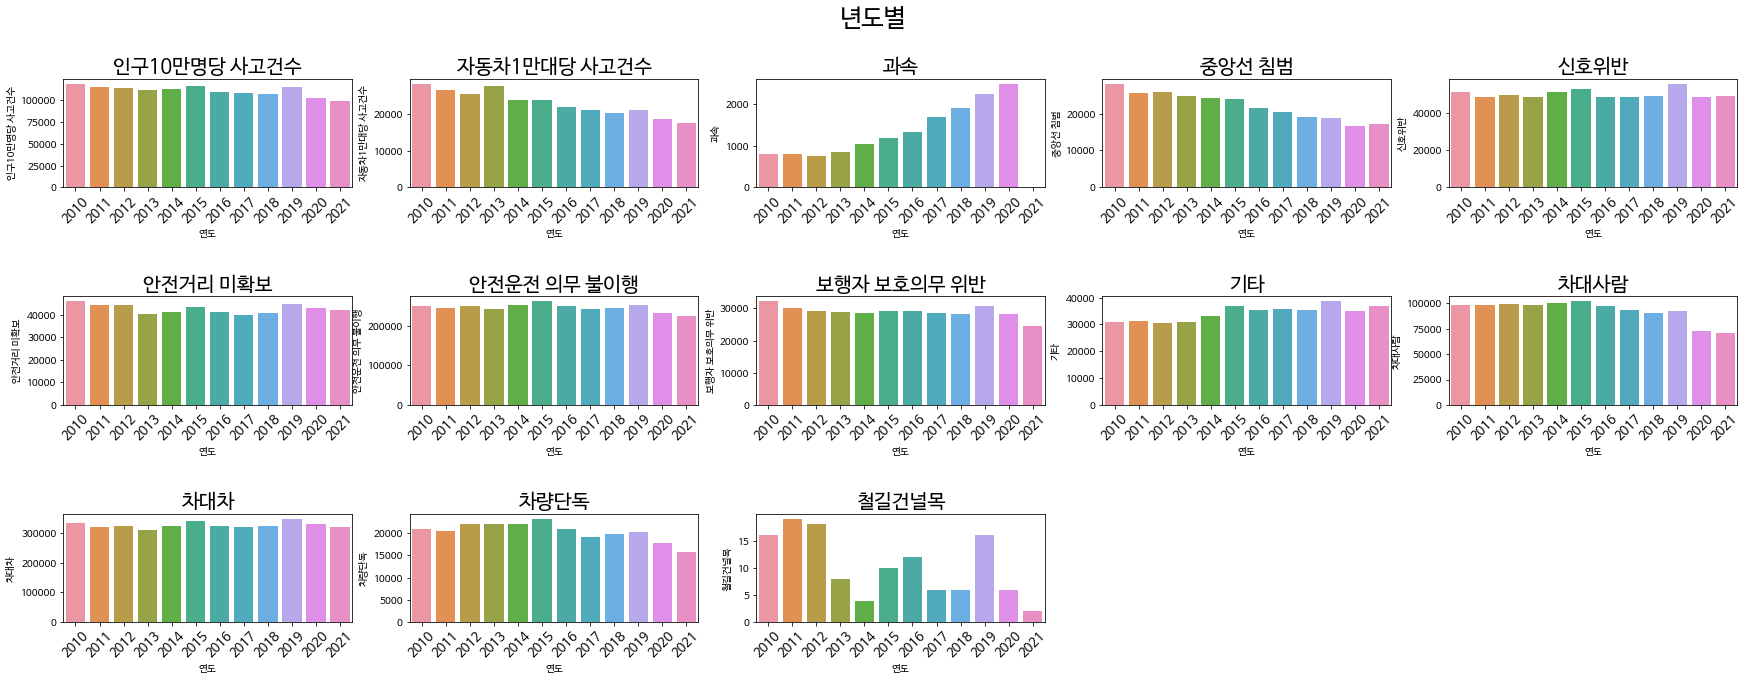

In [ ]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(hspace=1)
plot_df = ac[(ac['대상사고 구분명'] == '전체')].groupby('연도').sum()
for i in range(13):
  plt.subplot(3,5,i+1)
  sns.barplot(x = plot_df.index , y = plot_df.iloc[:,7+i])
  plt.title(plot_df.columns[7+i],size=20)
  plt.xticks(rotation=45,size=13)

plt.suptitle('년도별',size=25)
plt.show()


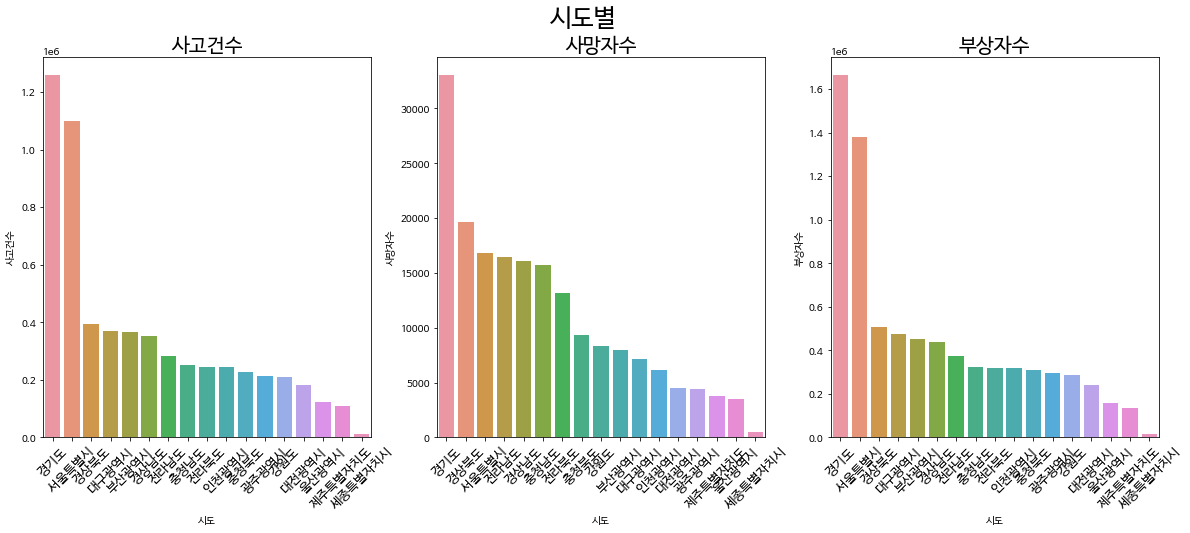

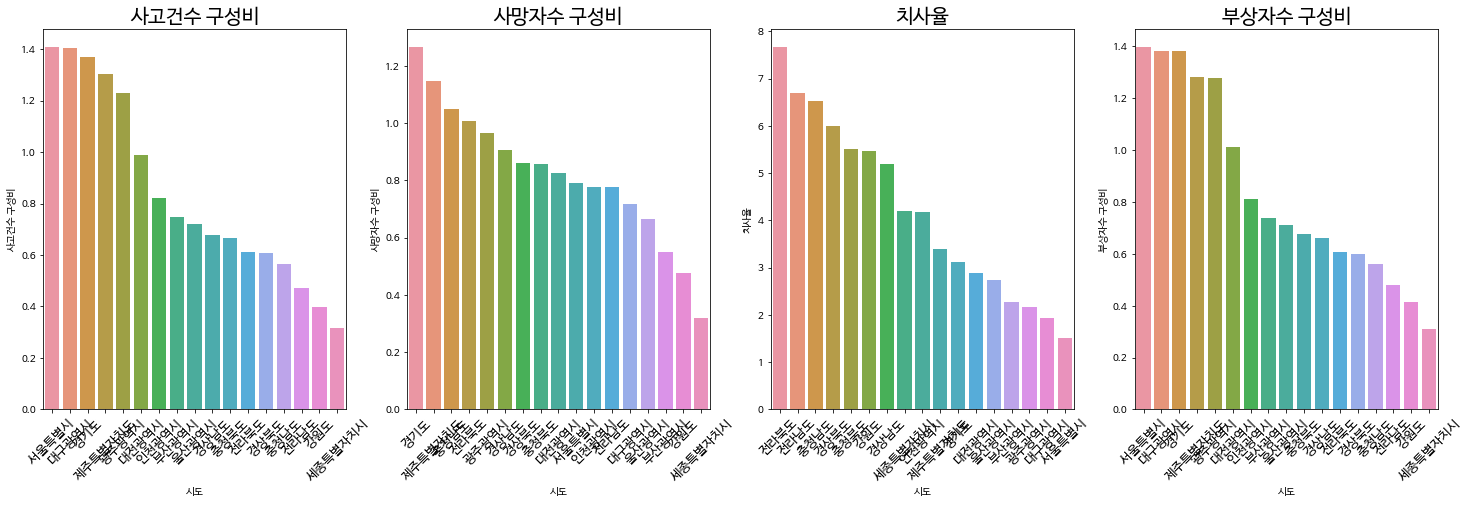

In [ ]:
plt.figure(figsize=(20,7))
plt.subplots_adjust(hspace=1)
plot_df = ac[(ac['대상사고 구분명'] != '전체')].groupby('시도').sum()

col_index = [1,3,6]
for i in range(len(col_index)):
  plt.subplot(1,3,i+1)
  sns.barplot(x = plot_df.iloc[:,col_index[i]].sort_values()[::-1].index , y = plot_df.iloc[:,col_index[i]].sort_values()[::-1])
  plt.title(plot_df.columns[col_index[i]],size=20)
  plt.xticks(rotation=45,size=13)

plt.suptitle('시도별',size=25)
plt.show()

plt.figure(figsize=(25,7))
plt.subplots_adjust(hspace=1)
plot_df = ac[(ac['대상사고 구분명'] != '전체')].groupby('시도').mean()

col_index = [2,4,5,7]
for i in range(len(col_index)):
  plt.subplot(1,4,i+1)
  sns.barplot(x = plot_df.iloc[:,col_index[i]].sort_values()[::-1].index , y = plot_df.iloc[:,col_index[i]].sort_values()[::-1])
  plt.title(plot_df.columns[col_index[i]],size=20)
  plt.xticks(rotation=45,size=13)

plt.show()


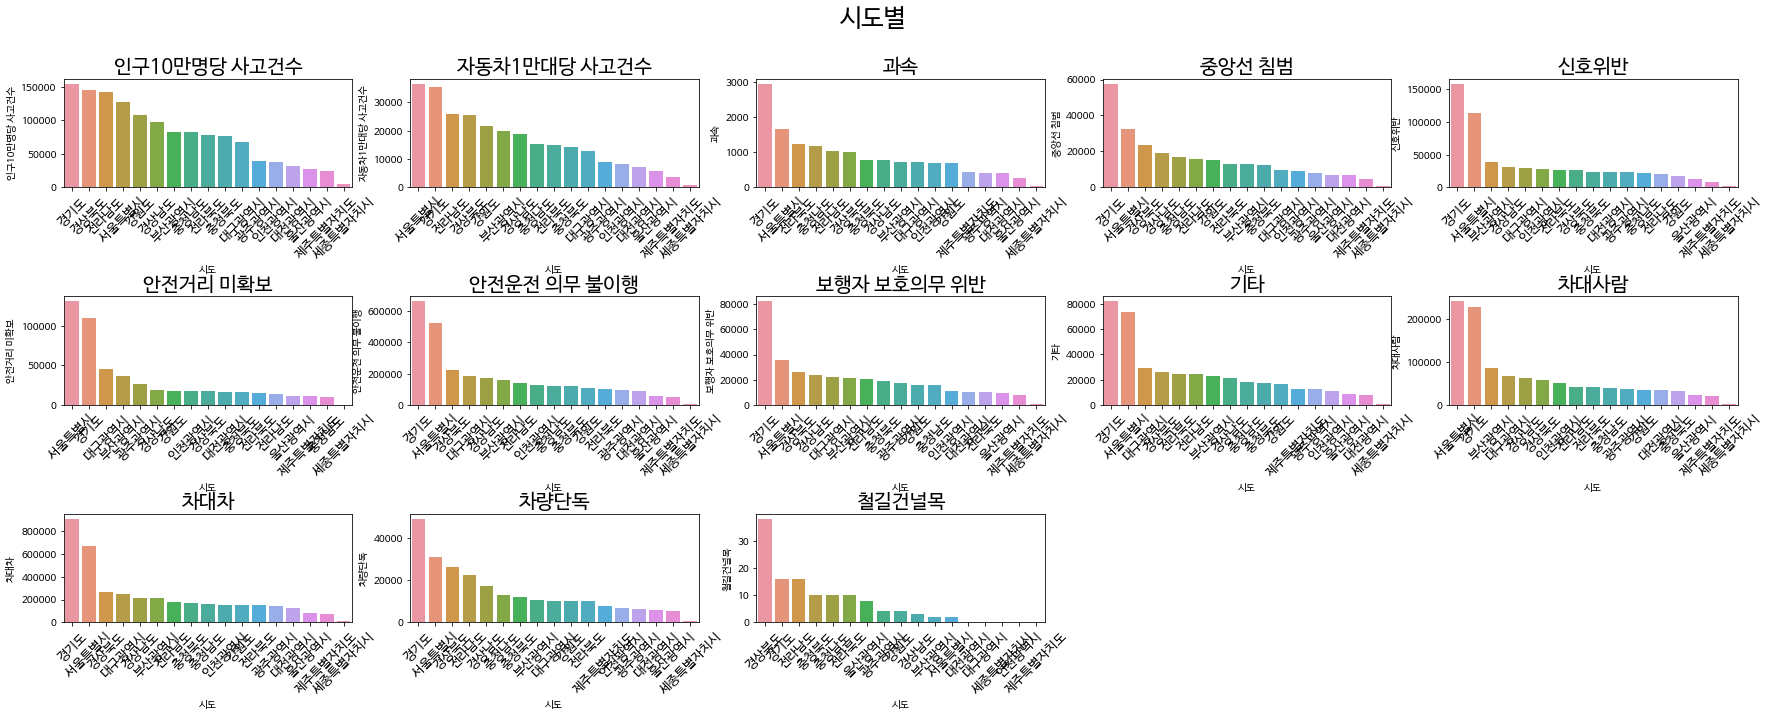

In [ ]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(hspace=1)
plot_df = ac[(ac['대상사고 구분명'] == '전체')].groupby('시도').sum()
for i in range(13):
  plt.subplot(3,5,i+1)
  sns.barplot(x = plot_df.iloc[:,8+i].sort_values()[::-1].index , y = plot_df.iloc[:,8+i].sort_values()[::-1])
  plt.title(plot_df.columns[8+i],size=20)
  plt.xticks(rotation=45,size=13)

plt.suptitle('시도별',size=25)
plt.show()

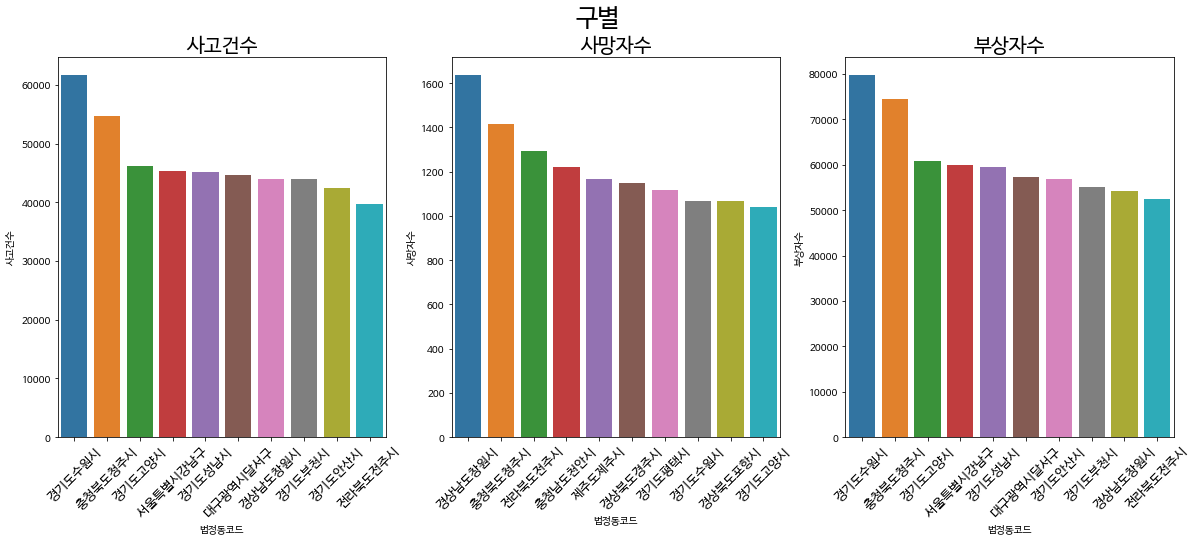

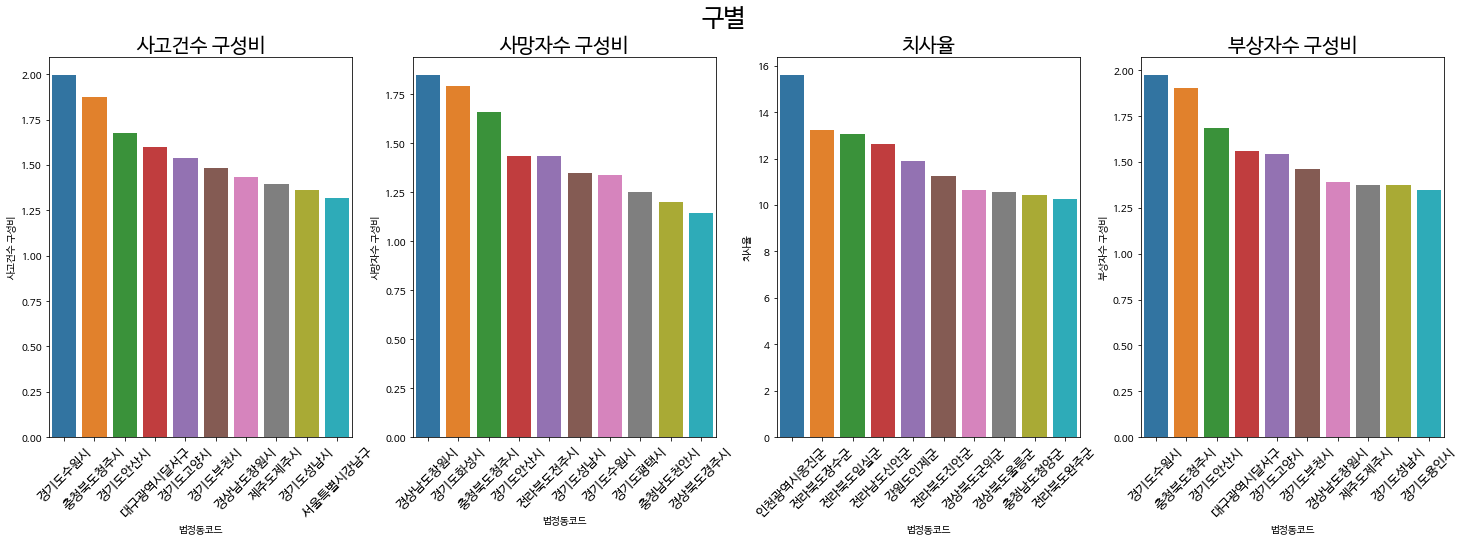

In [ ]:
code1 = pd.read_excel('./코드 정보.xlsx',sheet_name=1)

drop_index = []
for c in code1['종류']:
  dd = ac[ac['법정동코드'] == c]
  drop_index.append(list(dd.index))

aa = ac.drop(sum(drop_index,[]))

plot_df = aa[(aa['대상사고 구분명'] != '전체')].groupby('법정동코드').sum()

plt.figure(figsize=(20,7))
plt.subplots_adjust(hspace=1)
col_index = [1,3,6]

for i in range(len(col_index)):
  plt.subplot(1,3,i+1)
  sns.barplot(x = plot_df.iloc[:,col_index[i]].sort_values()[::-1][:10].index , y = plot_df.iloc[:,col_index[i]].sort_values()[::-1][:10])
  plt.title(plot_df.columns[col_index[i]],size=20)
  plt.xticks(rotation=45,size=13)

plt.suptitle('구별',size=25)
plt.show()

plot_df = aa[(aa['대상사고 구분명'] != '전체')].groupby('법정동코드').mean()

plt.figure(figsize=(25,7))
plt.subplots_adjust(hspace=1)
col_index = [2,4,5,7]

for i in range(len(col_index)):
  plt.subplot(1,4,i+1)
  sns.barplot(x = plot_df.iloc[:,col_index[i]].sort_values()[::-1][:10].index , y = plot_df.iloc[:,col_index[i]].sort_values()[::-1][:10])
  plt.title(plot_df.columns[col_index[i]],size=20)
  plt.xticks(rotation=45,size=13)

plt.suptitle('구별',size=25)
plt.show()

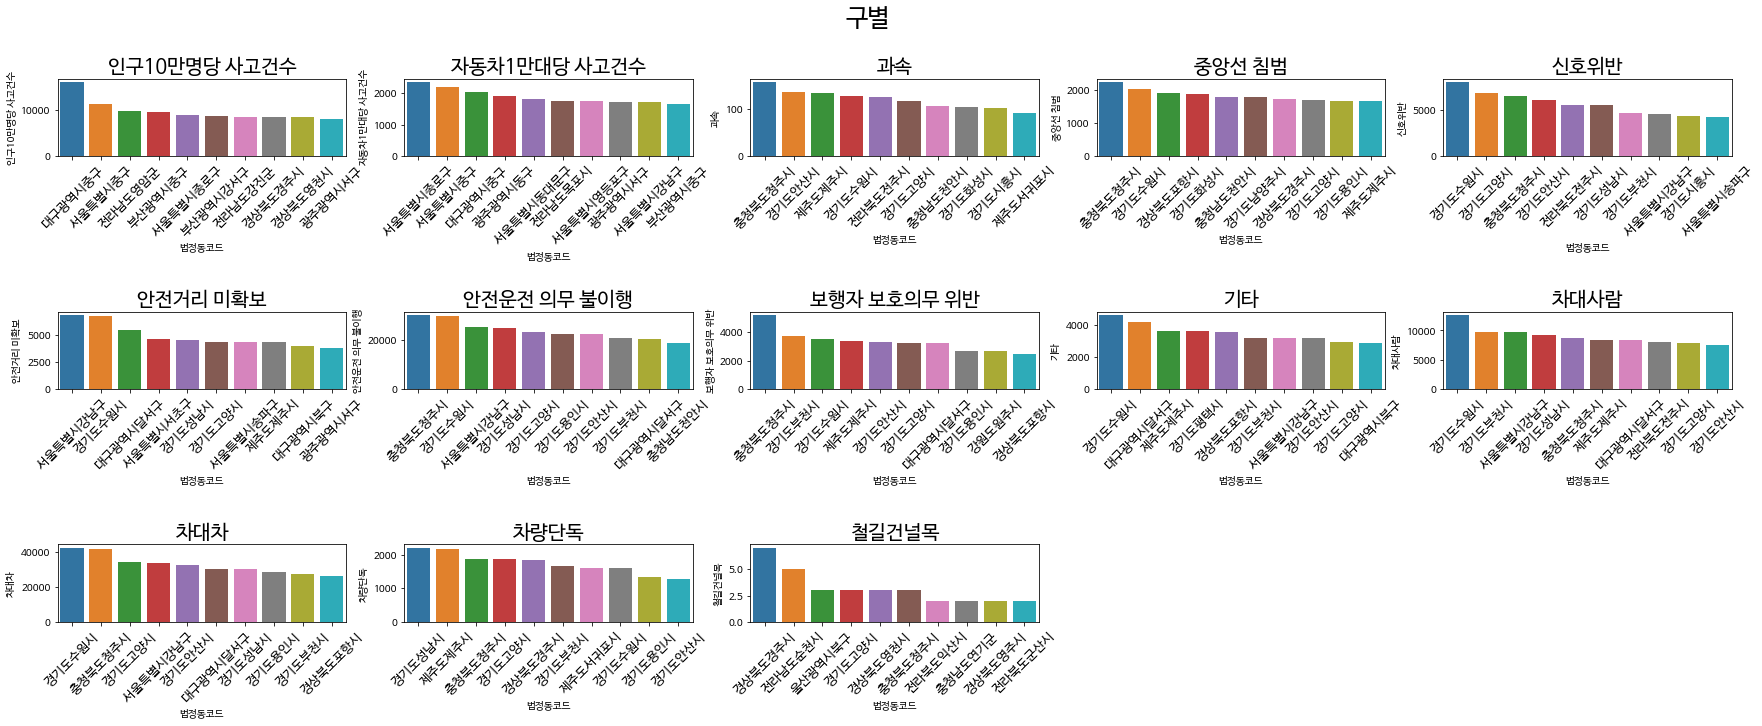

In [ ]:
code1 = pd.read_excel('./코드 정보.xlsx',sheet_name=1)

drop_index = []
for c in code1['종류']:
  dd = ac[ac['법정동코드'] == c]
  drop_index.append(list(dd.index))

aa = ac.drop(sum(drop_index,[]))

plot_df = aa[(aa['대상사고 구분명'] == '전체')].groupby('법정동코드').sum()

plt.figure(figsize=(30,10))
plt.subplots_adjust(hspace=2)
for i in range(13):
  plt.subplot(3,5,i+1)
  sns.barplot(x = plot_df.iloc[:,8+i].sort_values()[::-1][:10].index , y = plot_df.iloc[:,8+i].sort_values()[::-1][:10])
  plt.title(plot_df.columns[8+i],size=20)
  plt.xticks(rotation=45,size=13)

plt.suptitle('구별',size=25)
plt.show()


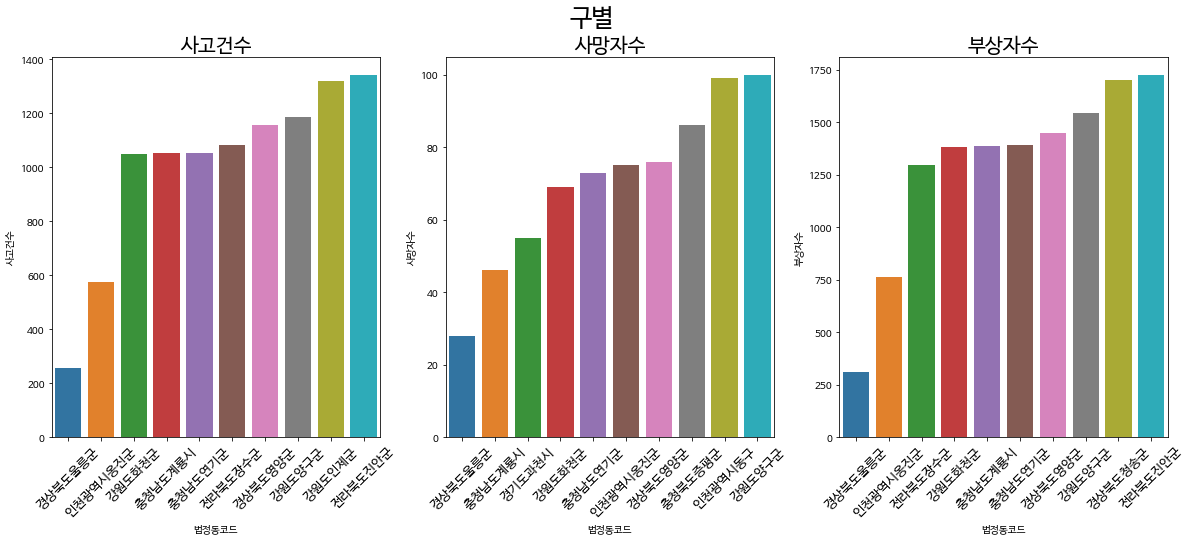

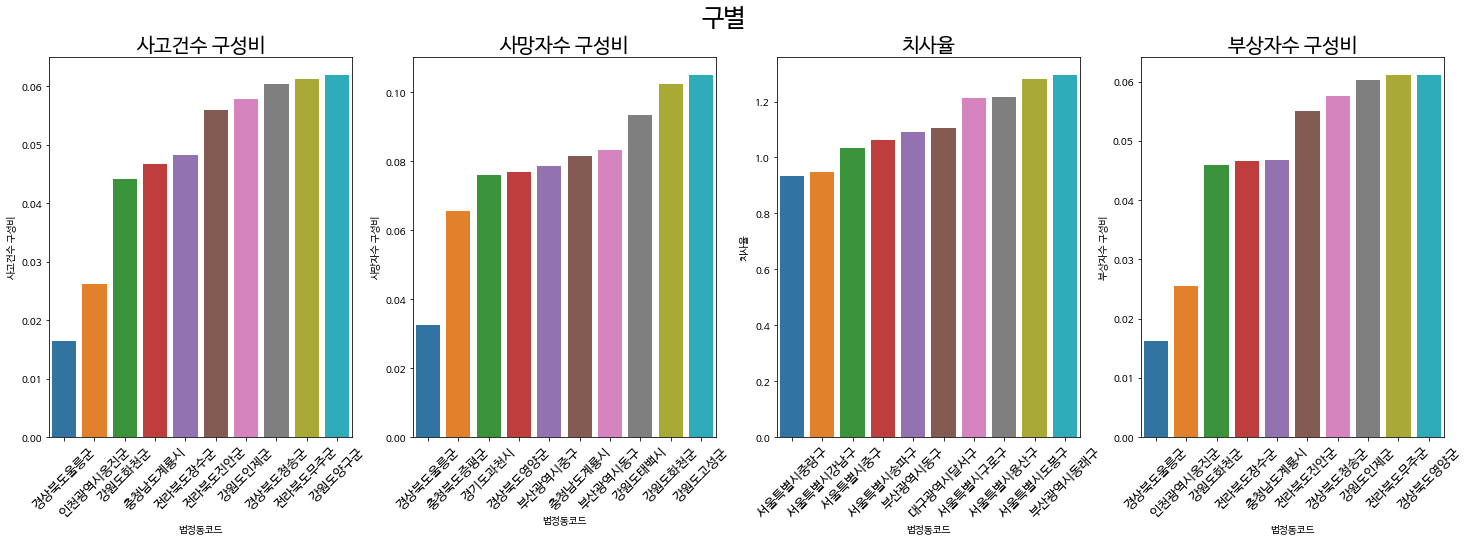

In [ ]:
code1 = pd.read_excel('./코드 정보.xlsx',sheet_name=1)

drop_index = []
for c in code1['종류']:
  dd = ac[ac['법정동코드'] == c]
  drop_index.append(list(dd.index))

aa = ac.drop(sum(drop_index,[]))

plot_df = aa[(aa['대상사고 구분명'] != '전체')].groupby('법정동코드').sum()

plt.figure(figsize=(20,7))
plt.subplots_adjust(hspace=1)
col_index = [1,3,6]

for i in range(len(col_index)):
  plt.subplot(1,3,i+1)
  sns.barplot(x = plot_df.iloc[:,col_index[i]].sort_values()[:10].index , y = plot_df.iloc[:,col_index[i]].sort_values()[:10])
  plt.title(plot_df.columns[col_index[i]],size=20)
  plt.xticks(rotation=45,size=13)

plt.suptitle('구별',size=25)
plt.show()

plot_df = aa[(aa['대상사고 구분명'] != '전체')].groupby('법정동코드').mean()

plt.figure(figsize=(25,7))
plt.subplots_adjust(hspace=1)
col_index = [2,4,5,7]

for i in range(len(col_index)):
  plt.subplot(1,4,i+1)
  sns.barplot(x = plot_df.iloc[:,col_index[i]].sort_values()[:10].index , y = plot_df.iloc[:,col_index[i]].sort_values()[:10])
  plt.title(plot_df.columns[col_index[i]],size=20)
  plt.xticks(rotation=45,size=13)

plt.suptitle('구별',size=25)
plt.show()

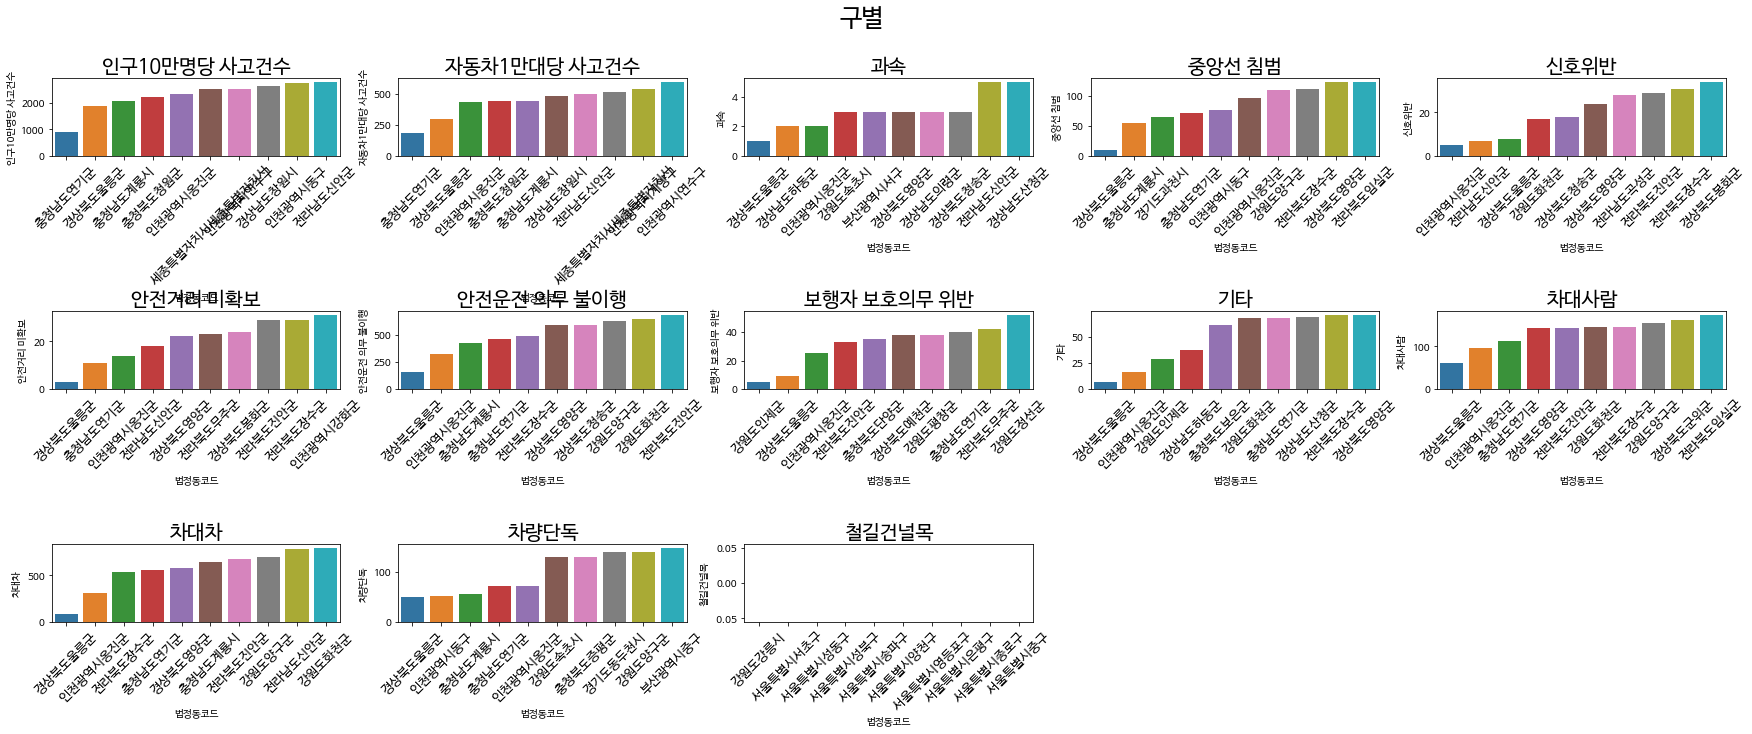

In [ ]:
code1 = pd.read_excel('./코드 정보.xlsx',sheet_name=1)

drop_index = []
for c in code1['종류']:
  dd = ac[ac['법정동코드'] == c]
  drop_index.append(list(dd.index))

aa = ac.drop(sum(drop_index,[]))

plot_df = aa[(aa['대상사고 구분명'] == '전체')].groupby('법정동코드').sum()

plt.figure(figsize=(30,10))
plt.subplots_adjust(hspace=2)
for i in range(13):
  plt.subplot(3,5,i+1)
  sns.barplot(x = plot_df.iloc[:,8+i].sort_values()[:10].index , y = plot_df.iloc[:,8+i].sort_values()[:10])
  plt.title(plot_df.columns[8+i],size=20)
  plt.xticks(rotation=45,size=13)

plt.suptitle('구별',size=25)
plt.show()


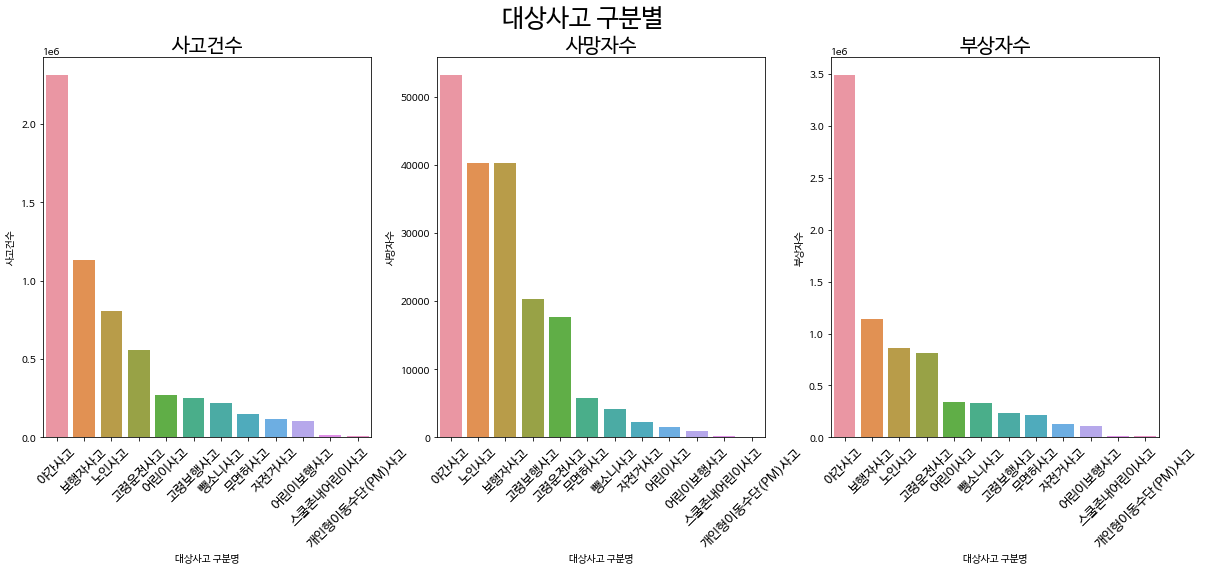

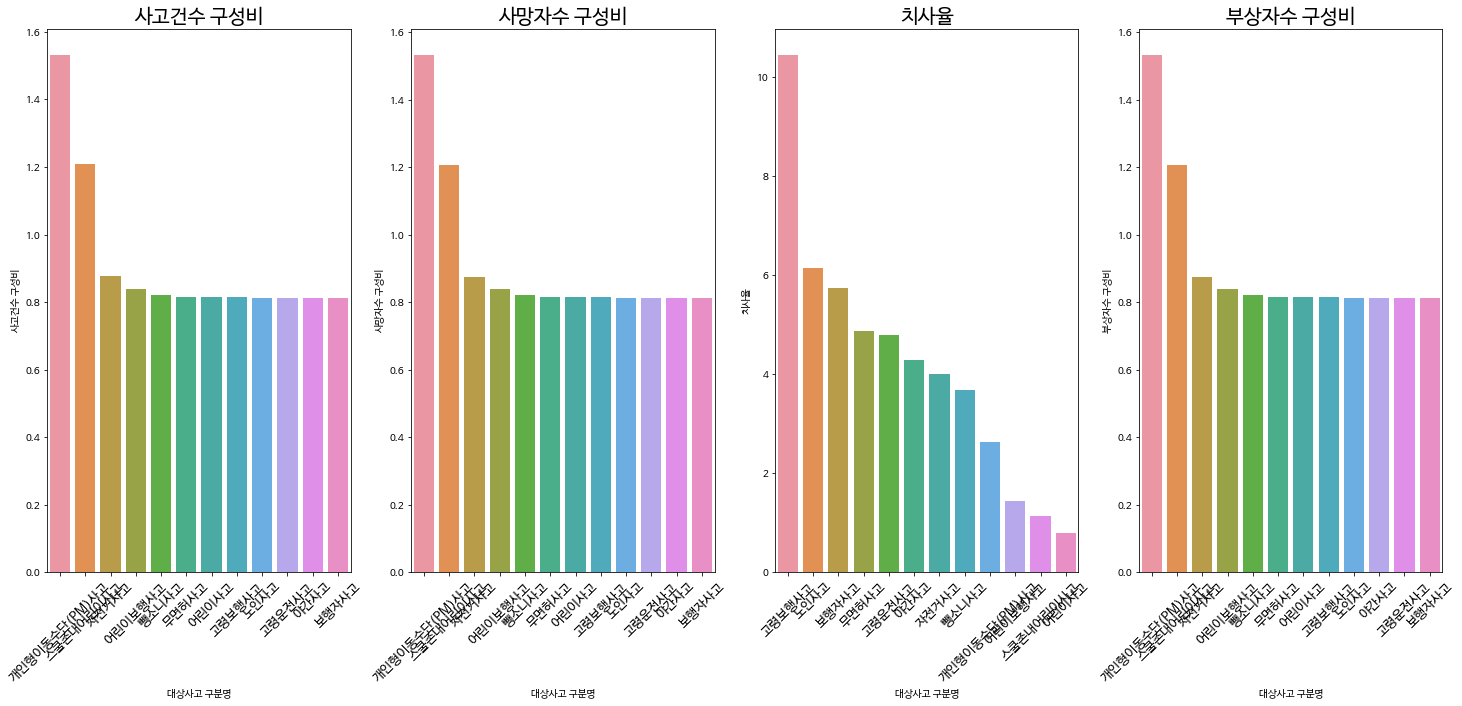

In [ ]:
plt.figure(figsize=(20,7))
plt.subplots_adjust(hspace=1)
plot_df = ac[(ac['대상사고 구분명'] != '전체')].groupby('대상사고 구분명').sum()

col_index = [1,3,6]
for i in range(len(col_index)):
  plt.subplot(1,3,i+1)
  sns.barplot(x = plot_df.iloc[:,col_index[i]].sort_values()[::-1].index , y = plot_df.iloc[:,col_index[i]].sort_values()[::-1])
  plt.title(plot_df.columns[col_index[i]],size=20)
  plt.xticks(rotation=45,size=13)

plt.suptitle('대상사고 구분별',size=25)
plt.show()

plt.figure(figsize=(25,10))
plt.subplots_adjust(hspace=1)
plot_df = ac[(ac['대상사고 구분명'] != '전체')].groupby('대상사고 구분명').mean()

col_index = [2,4,5,7]
for i in range(len(col_index)):
  plt.subplot(1,4,i+1)
  sns.barplot(x = plot_df.iloc[:,col_index[i]].sort_values()[::-1].index , y = plot_df.iloc[:,col_index[i]].sort_values()[::-1])
  plt.title(plot_df.columns[col_index[i]],size=20)
  plt.xticks(rotation=45,size=13)

plt.show()
